# Welcome to WOA7015 Advance Machine Learning Lab - Week 7
This code is generated for the purpose of WOA7015 module.



# Section 1 : K-mean clustering

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()
%matplotlib inline

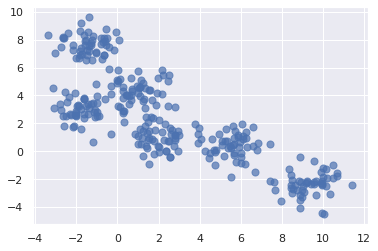

In [2]:
# generate the coordinate pairs
points, cluster_indexes = make_blobs(n_samples=300, centers=6, cluster_std=0.8, random_state=0)
 
x = points[:, 0]
y = points[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)

array([[-1.7713324 ,  2.97850452],
       [ 9.31609098, -2.3582019 ],
       [ 1.96289862,  0.97340371],
       [-1.3967246 ,  7.6326279 ],
       [ 0.98062235,  4.29172731],
       [ 5.52901456,  0.41781617]])

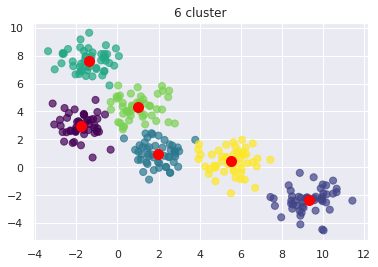

In [3]:
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.figure()
plt.title(f'%d cluster' % (k))
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)

centers

### Now you try to play around by changing 
- cluster_std
- k 
and see how clustering changes

### Which k to choose? Here we look at what happen to the cluster when different k is used

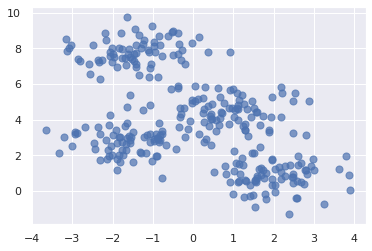

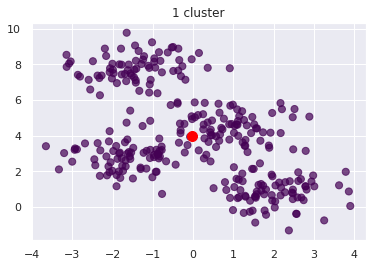

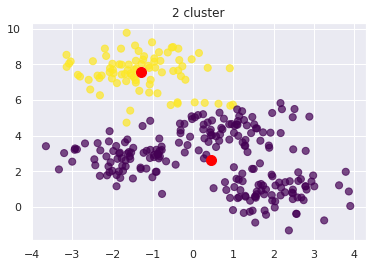

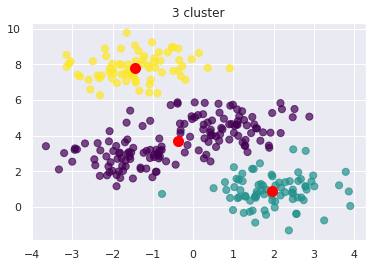

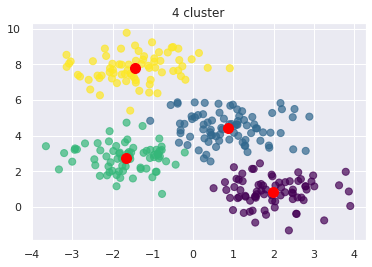

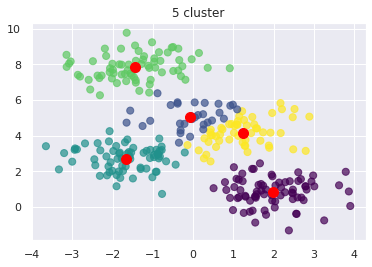

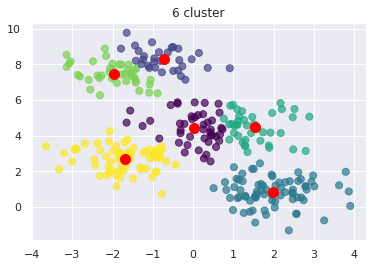

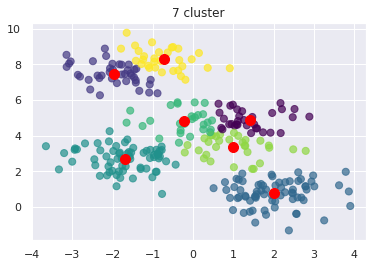

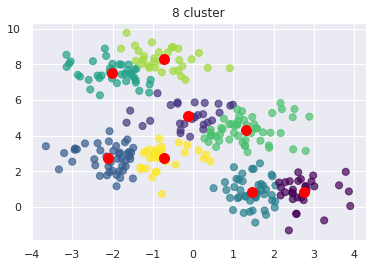

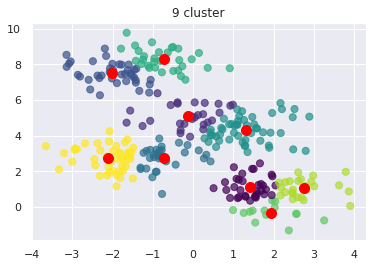

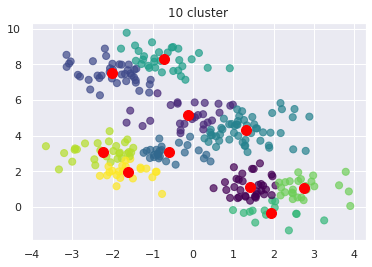

In [4]:
# generate the coordinate pairs
points, cluster_indexes = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
 
x = points[:, 0]
y = points[:, 1]
 
plt.scatter(x, y, s=50, alpha=0.7)

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(points)
  predicted_cluster_indexes = kmeans.predict(points)
  
  plt.figure()
  plt.title(f'%d cluster' % (k))
  plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap='viridis')
  
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
  

## Choose the best K - elbow method
An optimal number of K = the point in which the inertia does not drop much after adding another cluster. 

Text(0, 0.5, 'Inertia')

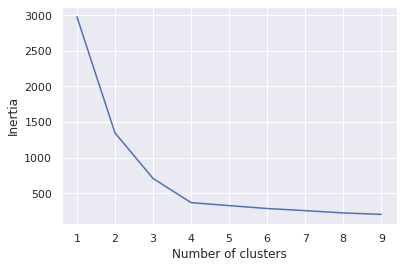

In [5]:
inertias = []
 
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)
 
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
#@title Q1: Which k is the best based on elbow method? (2%)
Answer = "4" #@param ["Choose your answer", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [ ]:
#@title Q2: Why? (2%)
Answer = "It is the point where there's an obvious improvement of the inertia or decrease in sum of squares value and an plateau of of change for subsequent k values. " #@param {type :'string'}

# Section 2: Principal Component Analysis

Facts: 
*   PCA is often used to measure data in term of its principal components rather than on a normal x-y axis
*   Principal components describes the direction of the data in which the variance is the highest / spread out.
*   PCA is a dimensional reduction or data compression method
*   Mathematically, the principal components are the eigen vector of the covariance matrix of orignal datasets. 
*   The principal components (eigen vector) correspond to the direction with the greatest variance in data. 
*   Each eigen vector has a corresponding eigenvalue. The eigenvalue is a scalar value and indicates how much variance there is in the data along that eigenvector. 









### In this section, we will write our PCA code. 

In [6]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

##Step 1: Generate the matrix in Slide 74. Make it to panda Dataframe with title f1, f2, f3, f4


In [7]:
# Your code here. 
data = {
    'f1':[1,5,1,5,8],
    'f2':[2,5,4,3,1],
    'f3':[3,6,2,2,2],
    'f4':[4,7,3,1,2]
}

df = pd.DataFrame(data)

df

f1  f2  f3  f4
0   1   2   3   4
1   5   5   6   7
2   1   4   2   3
3   5   3   2   1
4   8   1   2   2

In [ ]:
#@title Answer. Please try yourselves before you see the answer. 
# Matrix of orignal data
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])
df = pd.DataFrame(A, columns=['f1', 'f2', 'f3','f4'])
df

f1  f2  f3  f4
0   1   2   3   4
1   5   5   6   7
2   1   4   2   3
3   5   3   2   1
4   8   1   2   2

## Step 2: Standardize your data. Convert them to z-score. 

In [8]:
# your code here 
# make use of panda function to find the mean
df_mean = df.mean()
df_std = df.std()
df_zscore = (df- df_mean)/df_std

print(df_mean)
print(df_std)
print(df_zscore)

f1    4.0
f2    3.0
f3    3.0
f4    3.4
dtype: float64
f1    3.000000
f2    1.581139
f3    1.732051
f4    2.302173
dtype: float64
         f1        f2        f3        f4
0 -1.000000 -0.632456  0.000000  0.260623
1  0.333333  1.264911  1.732051  1.563740
2 -1.000000  0.632456 -0.577350 -0.173749
3  0.333333  0.000000 -0.577350 -1.042493
4  1.333333 -1.264911 -0.577350 -0.608121


In [ ]:
#@title Answer. Please try yourselves before you see the answer.
# 1. Standardize data
df_std = (df-df.mean()) / df.std()
df_std

f1        f2        f3        f4
0 -1.000000 -0.632456  0.000000  0.260623
1  0.333333  1.264911  1.732051  1.563740
2 -1.000000  0.632456 -0.577350 -0.173749
3  0.333333  0.000000 -0.577350 -1.042493
4  1.333333 -1.264911 -0.577350 -0.608121

## Step 3: Calculate covariance matrix for the features in the datasets.
Hint: use np.cov() function

In [9]:
# your code here
df_numpy = df_zscore.to_numpy()

df_cov = np.cov(df_numpy, rowvar=0, bias=True)

df_cov

array([[ 0.8       , -0.25298221,  0.03849002, -0.14479075],
       [-0.25298221,  0.8       ,  0.51120772,  0.49449803],
       [ 0.03849002,  0.51120772,  0.8       ,  0.75235479],
       [-0.14479075,  0.49449803,  0.75235479,  0.8       ]])

In [ ]:
#@title Answer. Please try yourselves before you see the answer.
covMatrix = np.cov(df_std.to_numpy(), rowvar=0, bias=True)
print('covMatrix')
print(covMatrix)


covMatrix
[[ 0.8        -0.25298221  0.03849002 -0.14479075]
 [-0.25298221  0.8         0.51120772  0.49449803]
 [ 0.03849002  0.51120772  0.8         0.75235479]
 [-0.14479075  0.49449803  0.75235479  0.8       ]]


## Step 4: Compute eigenvalue and eigenvector.
Hint: use LA.eig() function.  

In [10]:
# your code here
evalue, evect = np.linalg.eig(df_cov)
print("eigenvalue")
print(evalue)
print('\n')
print("eigenvector")
print(evect)

eigenvalue
[2.01263459 0.8522308  0.31510964 0.02002497]


eigenvector
[[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


In [ ]:
#@title Answer. Please try yourselves before you see the answer.
w, v = LA.eig(covMatrix)
print('eigenvalue')
print(w)
print()
print('eigenvector')
print(v)



eigenvalue
[2.01263459 0.8522308  0.31510964 0.02002497]

eigenvector
[[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


## Step 5: Transform to principal component space using 4 PCA component (slide87) 
Hint: use np.matmul() for matrix multiplication. 

In [11]:
# your code here
k = 4
B = evect[:, :k]
print("Zscore matrix in numpy")
print(df_numpy)
print("--------------------")
print("k number: %s"%(k))
print("--------------------")
print("B matrix = eigenvector matrix: ")
print(B)
print("--------------------")
print("Transformed Matrix = zscore matrix * eigenvector matrix")
transform_mat = np.matmul(df_numpy,B)
print(transform_mat)


Zscore matrix in numpy
[[-1.         -0.63245553  0.          0.26062335]
 [ 0.33333333  1.26491106  1.73205081  1.56374007]
 [-1.          0.63245553 -0.57735027 -0.1737489 ]
 [ 0.33333333  0.         -0.57735027 -1.04249338]
 [ 1.33333333 -1.26491106 -0.57735027 -0.60812114]]
--------------------
k number: 4
--------------------
B matrix = eigenvector matrix: 
[[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]
--------------------
Transformed Matrix = zscore matrix * eigenvector matrix
[[ 1.40033078e-02  7.55974765e-01  9.41199615e-01 -1.01852226e-01]
 [-2.55653399e+00 -7.80431775e-01 -1.06869861e-01 -5.75705265e-03]
 [-5.14801919e-02  1.25313470e+00 -3.96673397e-01  1.82141242e-01]
 [ 1.01415002e+00  2.38808310e-04 -6.79886182e-01 -2.01224649e-01]
 [ 1.57986086e+00 -1.22891650e+00  2.42229826e-01  1.26692685e-01]]


In [12]:
#@title Answer. Please try yourselves before you see the answer.
k = 4
B = evect[:, :k]
transform_mat = np.matmul(df_numpy, B) 
print(f"transform_matrix with {k} principal components")
print(transform_mat)
print('------------------------------------------------\n')

transform_matrix with 4 principal components
[[ 1.40033078e-02  7.55974765e-01  9.41199615e-01 -1.01852226e-01]
 [-2.55653399e+00 -7.80431775e-01 -1.06869861e-01 -5.75705265e-03]
 [-5.14801919e-02  1.25313470e+00 -3.96673397e-01  1.82141242e-01]
 [ 1.01415002e+00  2.38808310e-04 -6.79886182e-01 -2.01224649e-01]
 [ 1.57986086e+00 -1.22891650e+00  2.42229826e-01  1.26692685e-01]]
------------------------------------------------



## Step 6: Transform back to original datasets
Hint: use np.linalg.inv() to compute inverse

In [13]:
# your code here
print("B matrix = eigenvector matrix: ")
print(B)
print("------------------------")
print("Transformed Matrix = zscore matrix * eigenvector matrix")
print(transform_mat)
print("------------------------")
ori_zscore_mat = np.matmul(transform_mat, np.linalg.inv(B))
print("zscore matrix: ")
print(ori_zscore_mat)
print("------------------------")
ori_zscore_mat_df = pd.DataFrame(ori_zscore_mat, columns=['f1', 'f2', 'f3','f4'])
print("zscore matrix in data frame: ")
print(ori_zscore_mat_df)
print("------------------------")
print("Standard deviation")
print(df_std)
print("------------------------")
print("matrix mean")
print(df_mean)
print("------------------------")
ori_mat = ori_zscore_mat_df.multiply(df_std) + df_mean
print("The Original Matrix")
print(ori_mat)

B matrix = eigenvector matrix: 
[[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]
------------------------
Transformed Matrix = zscore matrix * eigenvector matrix
[[ 1.40033078e-02  7.55974765e-01  9.41199615e-01 -1.01852226e-01]
 [-2.55653399e+00 -7.80431775e-01 -1.06869861e-01 -5.75705265e-03]
 [-5.14801919e-02  1.25313470e+00 -3.96673397e-01  1.82141242e-01]
 [ 1.01415002e+00  2.38808310e-04 -6.79886182e-01 -2.01224649e-01]
 [ 1.57986086e+00 -1.22891650e+00  2.42229826e-01  1.26692685e-01]]
------------------------
zscore matrix: 
[[-1.00000000e+00 -6.32455532e-01  2.64070595e-17  2.60623346e-01]
 [ 3.33333333e-01  1.26491106e+00  1.73205081e+00  1.56374007e+00]
 [-1.00000000e+00  6.32455532e-01 -5.77350269e-01 -1.73748897e-01]
 [ 3.33333333e-01  5.69847144e-17 -5.77350269e-01 -1.04249338e+00]
 [ 1.33333333e+00 -1.26491106e+00 -5.

In [ ]:
#@title Answer. Please try yourselves before you see the answer.
# transform back to original space
ori_std_mat = np.matmul(transform_mat, np.linalg.inv(B))
ori_std_mat_df = pd.DataFrame(ori_std_mat, columns=['f1', 'f2', 'f3','f4'])
ori_mat = ori_std_mat_df.multiply(df.std()) + df.mean()
print(ori_mat)
print('------------------------------------------------\n')

    f1   f2   f3   f4
0  1.0  2.0  3.0  4.0
1  5.0  5.0  6.0  7.0
2  1.0  4.0  2.0  3.0
3  5.0  3.0  2.0  1.0
4  8.0  1.0  2.0  2.0
------------------------------------------------



## Here we look at how much information is retained when different k-component is used. 

transform_matrix with 1 principal components
[[ 0.01400331]
 [-2.55653399]
 [-0.05148019]
 [ 1.01415002]
 [ 1.57986086]]
------------------------------------------------

         f1        f2        f3        f4
0  4.006804  2.988397  2.985789  3.380769
1  2.757832  5.118326  5.594377  6.911025
2  3.974987  3.042656  3.052242  3.470701
3  4.492755  2.159683  1.970838  2.007214
4  4.767622  1.690939  1.396753  1.230293
------------------------------------------------

transform_matrix with 2 principal components
[[ 1.40033078e-02  7.55974765e-01]
 [-2.55653399e+00 -7.80431775e-01]
 [-5.14801919e-02  1.25313470e+00]
 [ 1.01415002e+00  2.38808310e-04]
 [ 1.57986086e+00 -1.22891650e+00]]
------------------------------------------------

         f1        f2        f3        f4
0  1.926984  3.235731  2.566079  3.178997
1  4.904938  4.862991  6.027665  7.119324
2  0.527392  3.452646  2.356514  3.136235
3  4.492098  2.159761  1.970705  2.007150
4  8.148588  1.288872  2.079036  1.558294
----

Text(0, 0.5, 'error')

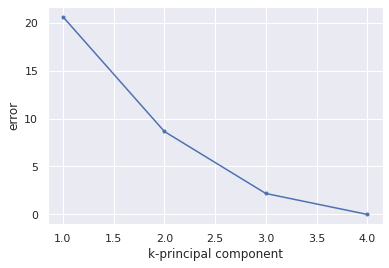

In [14]:
#@title
# tranform dataset to principal component space
err = []
pc=[]
for k in range(1, 5):
  B = evect[:, :k]
  B2 = np.matmul(np.transpose(B), B)  ## this is needed to ensure B is square matrix for computation
  B3 = np.matmul(B2, np.transpose(B)) ## this is needed to ensure B is square matrix for computation
  transform_mat = np.matmul(df_numpy, np.transpose(B3)) 
  print(f"transform_matrix with {k} principal components")
  print(transform_mat)
  print('------------------------------------------------\n')
  

  # transform back to original space
  ori_std_mat = np.matmul(transform_mat, B3)
  ori_std_mat_df = pd.DataFrame(ori_std_mat, columns=['f1', 'f2', 'f3','f4'])
  ori_mat = ori_std_mat_df.multiply(df.std()) + df.mean()
  print(ori_mat)
  print('------------------------------------------------\n')

  # compute the error between df and the matrix converted back after PCA
  err.append(np.sum(np.sum(abs(ori_mat - df))))
  pc.append(k)


plt.plot(pc, err, '.-')
plt.xlabel('k-principal component')
plt.ylabel('error')


## Try with PCA built in function 

covMatrix
[[ 0.8        -0.25298221  0.03849002 -0.14479075]
 [-0.25298221  0.8         0.51120772  0.49449803]
 [ 0.03849002  0.51120772  0.8         0.75235479]
 [-0.14479075  0.49449803  0.75235479  0.8       ]]
------------------------------------------------

k: 1
0.6289483102024861
         f1        f2        f3        f4
0  4.006804  2.988397  2.985789  3.380769
1  2.757832  5.118326  5.594377  6.911025
2  3.974987  3.042656  3.052242  3.470701
3  4.492755  2.159683  1.970838  2.007214
4  4.767622  1.690939  1.396753  1.230293
k: 2
0.8952704360795221
         f1        f2        f3        f4
0  1.926984  3.235731  2.566079  3.178997
1  4.904938  4.862991  6.027665  7.119324
2  0.527392  3.452646  2.356514  3.136235
3  4.492098  2.159761  1.970705  2.007150
4  8.148588  1.288872  2.079036  1.558294
k: 3
0.9937421970301336
         f1        f2        f3        f4
0  1.059939  2.019423  2.872965  4.153479
1  5.003388  5.001098  5.992820  7.008675
2  0.892813  3.965265  2.227175  

Text(0, 0.5, 'error')

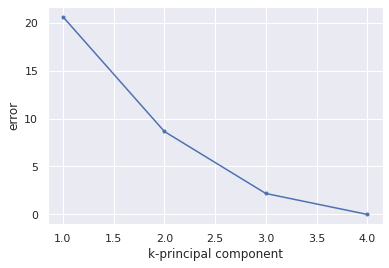

In [15]:
#@title
## Try with built in PCA function 

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from numpy import linalg as LA
import matplotlib.pyplot as plt

A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A, columns=['f1', 'f2', 'f3','f4'])
df_std = (df-df.mean()) / df.std()

covMatrix = np.cov(df_std.to_numpy(), rowvar=0, bias=True)
print('covMatrix')
print(covMatrix)
print('------------------------------------------------\n')

err=[]
pc=[]
for k in range(1, 5):
  print('k:', k)
  pca = PCA(n_components=k)   ## here we use PCA built in function 
  principalComponent = pca.fit_transform(df_std)
  principalDf = pca.fit_transform(df_std)
  print(np.sum(pca.explained_variance_ratio_) )

  # transform back to original space
  temp = pca.inverse_transform(principalDf) 
  ori_std_mat_df = pd.DataFrame(temp, columns=['f1', 'f2', 'f3','f4'])
  ori_mat = ori_std_mat_df.multiply(df.std()) + df.mean()
  print(ori_mat)
  
  # compute the error between df and the matrix converted back after PCA
  err.append(np.sum(np.sum(abs(ori_mat - df))))
  pc.append(k)

plt.plot(pc, err, '.-')
plt.xlabel('k-principal component')
plt.ylabel('error')

In [ ]:
#@title Q3: We observed that as k-principal component used increases, error decreases. What does this mean? (2%)
Answer = "Less information is lost if more principal components is used for for transformation" #@param ["Choose your answer", "Less information is lost if less principal components is used for transformation", "Less information is lost if more principal components is used for for transformation" ]

# Section 3: Case study of Faces recognition example using SVMs

In this section,  we will implement a face recognition algorithm using these methods with `scikit-learn`. We will use the image dataset [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/lfw.pdf) (LFW), which contains images with labels. We will use a fraction of these images to train an **SVM** classifier and try to predict unseen images. Before doing that we will use *PCA* to reduce the dimensionality of the images, and then use those for our model. 




In [1]:
#@title
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
#@title
# Download the data and load it in as a set of numpy arrays
# min_faces_per_person limits the dataset to have the image with at least that amount
lfw_people = fetch_lfw_people(min_faces_per_person=60, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the ID of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print ("Total dataset size:")
print ("n_samples: %d" % n_samples)
print ("n_features: %d" % n_features)
print ("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1348
n_features: 1850
n_classes: 8


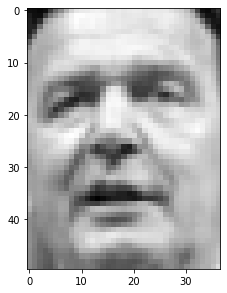

In [24]:
#@title
## Look at the data
visualize_face = np.random.randint(0, n_samples)

# Plotting the grey image of the above index
plt.figure(figsize=(3.6, 4.8))
plt.imshow(X[visualize_face].reshape((h, w)), cmap=plt.cm.gray) #gray, Blues
# plt.xticks(())
# plt.yticks(())

In [33]:
#@title
# split into a training (80%) and testing (20%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#@title
# Apply PCA to X features, we can change the n_components later 
n_components = 1000

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

# reconstructing the images from pca output --> eigenfaces
eigenfaces = pca.components_.reshape((n_components, h, w))

# Applying pca to training and test set
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 1000 eigenfaces from 1078 faces


In [50]:
#@title
# Train SVM model with PCA components

print("Fitting the classifier to the training set")

# Hyperparameter Tuning
## parameters C and gamma for SVM, see lecture 10 for more explanation
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

# Creating SVM classifier with GridSearch
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5, n_jobs=3)

# Training our classfier
clf = clf.fit(X_train_pca, y_train)

print("Best estimator found by grid search: \n{}".format(clf.best_estimator_))


Fitting the classifier to the training set
Best estimator found by grid search: 
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)


In [51]:
#@title
# Evaluation of the model quality on the test set
print("Predicting people's names on the test set\n")
# Predictin for the test set
y_pred = clf.predict(X_test_pca)

# Prediction results
print(classification_report(y_test, y_pred, target_names=target_names))

Predicting people's names on the test set

                   precision    recall  f1-score   support

     Ariel Sharon       0.58      0.58      0.58        12
     Colin Powell       0.52      0.76      0.62        51
  Donald Rumsfeld       0.30      0.64      0.41        25
    George W Bush       0.85      0.54      0.66        98
Gerhard Schroeder       0.65      0.62      0.63        21
      Hugo Chavez       0.88      0.47      0.61        15
Junichiro Koizumi       1.00      0.30      0.46        10
       Tony Blair       0.56      0.53      0.54        38

         accuracy                           0.59       270
        macro avg       0.67      0.56      0.56       270
     weighted avg       0.68      0.59      0.60       270



## Look at the prediction 



In [52]:
#@title
def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    """Helper function to plot a gallery of portraits
    
       inputs:
          images (numpy array) : array of images that we want to show
          titles (string array) : 
          h (int) : height of the image
          w (int) : width of the image
          n_row (int) :
          n_col (int) :
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        

def title(y_pred, y_test, target_names, i):
    """Helper function to generate the title
    inputs:
      y_pred : List of predictions 
      y_test : 
    
    outputs:
    """
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:%s' % (pred_name, true_name)



In [ ]:
#@title
# Generate titles with predicted and true labels for the images
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
# Call the plot function with necessary parameters
plot_gallery(X_test, prediction_titles, h, w)

plt.show()

In [ ]:
#@title
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

## Now is your turn
Try to re run the code above and answer the following questions

Q4: 
- k = 10, Accuracy = 0.43
- k = 100, Accuracy = 0.86
- k = 1000, Accuracy = 0.60

In [57]:
#@title Q4: Which PCA components give the best results? (2%) 
Answer = "n_components = 100" #@param ["Choose your answer", "n_components = 10", "n_components = 100", "n_components = 1000"]

In [58]:
#@title Q5: Why? (2%)
Answer = "n_components = 10 underfitting, n_components = 1000 overfitting" #@param {type :'string'}

# Submission Instructions
Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.
If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.
Then, submit your lab as follows:

Go to File > Print > Save as PDF.
Double check that the entire notebook, from beginning to end, is in this PDF file. Upload the PDF to Spectrum. 

# References:
1. https://www.wintellect.com/unsupervised-learning-with-k-means-clustering-part-ii/ 

2. https://www.kaggle.com/halflingwizard/interpret-k-means-clusters-on-credit-card-dataset#Conclusion

3. https://www.kaggle.com/halflingwizard/interpret-k-means-clusters-on-credit-card-dataset/notebook#Preprocessing

4. https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html 